# Qualifying Test

## 기초 파이썬 코딩 문제
### 문제에 관한 질의사항이 있으실 경우, f_impro@naver.com으로 문의해주세요.

### Problem 1
#### 카드 13장을 가지고 있다. 카드를 임의로 섞은 뒤, 섞은 결과를 출력하고자 한다. 아래 답안란에 코드를 채워 프로그램을 완성하라.

In [3]:
import random
random.seed(13931)
cards = 'A K Q J 10 9 8 7 6 5 4 3 2'.split()
print('We have cards = ', cards)

We have cards =  ['A', 'K', 'Q', 'J', '10', '9', '8', '7', '6', '5', '4', '3', '2']


### 답안

In [4]:
import random 
import math 
tmp = []
for x in cards:
    tmp = tmp + [[random.random(), x]]
    
tmp.sort()

shuffleCard = []
for y in tmp:
    shuffleCard = shuffleCard + [y[1]]
    
print(shuffleCard)

['6', '4', '2', '9', 'J', '10', '7', '8', '3', 'Q', '5', 'K', 'A']


### Problem 2

#### 아래는 어떤 회사의 지난 1년간 주가 데이터를 불러온 것이다. 

In [5]:
# pip install pandas_datareader
# pip install yfinance

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
price=pdr.get_data_yahoo('000660.KS', start='2021-04-28')
print(price)

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close      Adj Close   Volume
Date                                                                      
2021-04-28  134500.0  135000.0  130000.0  130000.0  128108.734375  5596760
2021-04-29  132000.0  133000.0  129000.0  130000.0  128108.734375  3738266
2021-04-30  130000.0  130500.0  126500.0  128000.0  126137.828125  3955947
2021-05-03  127500.0  132500.0  127000.0  131500.0  129586.914062  4085398
2021-05-04  130500.0  132000.0  129000.0  132000.0  130079.632812  2547004
...              ...       ...       ...       ...            ...      ...
2022-04-25  109000.0  109500.0  108000.0  108000.0  108000.000000  2282343
2022-04-26  109500.0  111000.0  108000.0  111000.0  111000.000000  2969516
2022-04-27  108000.0  109500.0  107500.0  108500.0  108500.000000  3261290
2022-04-28  109500.0  110000.0  108000.0  109500.0  109500.000000  2804966
2022-04-29  110000.0  112500.0 

In [6]:
print(price.Close)
print(price.index)

Date
2021-04-28    130000.0
2021-04-29    130000.0
2021-04-30    128000.0
2021-05-03    131500.0
2021-05-04    132000.0
                ...   
2022-04-25    108000.0
2022-04-26    111000.0
2022-04-27    108500.0
2022-04-28    109500.0
2022-04-29    112500.0
Name: Close, Length: 248, dtype: float64
DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-06', '2021-05-07', '2021-05-10',
               '2021-05-11', '2021-05-12',
               ...
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)


#### 위의 데이터 중, 종가(Close)만을 이용하여 아래의 각 절차에 맞는 프로그램을 완성하라.

#### 1) Return 이라는 빈 array을 하나 만든다. 
#### 답안

In [7]:
import numpy as np
Return = np.array([])
print(Return)

[]


#### 2) 일별 수익률$(log(close)_t - log(close)_{t-1})$을 구해 새로운 column을 만들어 저장한다. $t$는 특정 날짜를 의미하며, $t-1$은 특정 날짜의 전날을 의미한다.
#### 답안

In [8]:
# Hint: close_t = np.array(price['Close'])[:-1]를 이용할 것.
import numpy as np 

close_t1 = np.array(price['Close'])
close_t = np.array(price['Close'])[:-1]
b = np.insert(close_t, 0, 1)

logb = np.log(b)
logclose_t = np.log(close_t1)


c = logclose_t - logb

#(검산) print(c)





#### 3) 2)에서 만든 일별 수익률 자료를 표본으로 항, 하나를 추출하여 Return 변수에 입력한다. 이 과정을 250번 반복하여 순차적으로 Return 에 이어붙인다(append). (이를 향후 1년 뒤의 일별 예측 수익률이라 정의한다.)
#### 답안

In [9]:
import numpy as np 
daily_return = np.append(Return, c)

#(검산)print(daily_return)


### Problem 3

#### Problem 2에서 얻은 일별 예측 수익률을 line plot으로 그려라. 이 때, x축에는 'time', y축에는 'predicted return'이라는 축제목이 붙어야 한다.

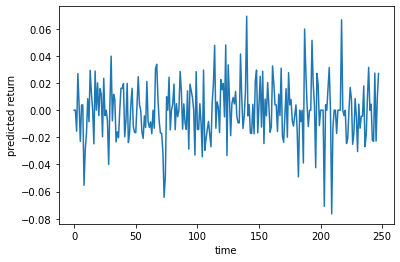

In [10]:
import numpy as np 
from matplotlib import pyplot as plt

#(첫째날-0번째날)로 계산된 array 첫 번째 값을 0으로 만들어준다. 
daily_return[0]= 0

plt.plot(daily_return)
plt.xlabel('time')
plt.ylabel('predicted return')

plt.show()